In [1]:
!pip install qiskit ipywidgets
!pip install pylatexenc
!pip install matplotlib
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=2e9f2a142e6d23806c697ec513504ba24a9428455e07d79b6cf8c4c6ebdc564e
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import *
from qiskit import *
from qiskit_aer import Aer
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import UnitaryGate

In [5]:
def generar_matriz_sumadora(n, k):
    """
    Genera una matriz unitaria para sumar k módulo 2^n en un circuito de n qubits.

    Args:
        n (int): Número de qubits.
        k (int): Cantidad a sumar módulo 2^n.

    Returns:
        np.ndarray: Matriz unitaria de tamaño 2^n x 2^n.
    """
    # Número de estados posibles
    N = 2**n

    # Crear una matriz de ceros
    matriz = np.zeros((N, N))

    # Llenar la matriz según f(x) = (x + k) mod N
    for x in range(N):
        # Calcular la posición de destino
        destino = (x + k) % N
        # Colocar un 1 en la posición adecuada
        matriz[destino, x] = 1

    return matriz

Resultados: {'0100': 1024}


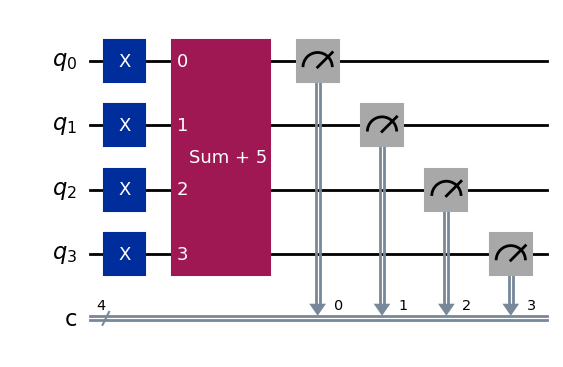

In [10]:
qc = QuantumCircuit(4,4)

qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)

# Matriz(n,k) / n = Numero qubits, k = cantidad a sumar en módulo 2^n
sumadorx = generar_matriz_sumadora(4, 5)

sumadorx= UnitaryGate(sumadorx, label="Sum + 5")
qc.append(sumadorx, [0, 1, 2, 3])

qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.measure(3,3)

sim = Aer.get_backend('qasm_simulator')

my_circuit = transpile(qc, sim)
job1 = sim.run(my_circuit)

result = job1.result()
counts = result.get_counts()
print("Resultados:", counts)

# Dibujar el circuito
qc.draw('mpl')

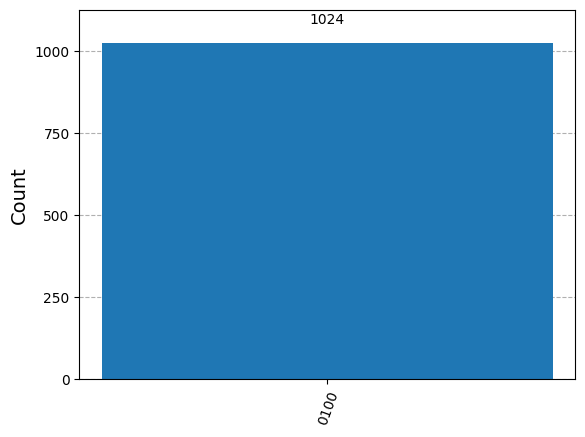

In [11]:
plot_histogram(counts)